In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [6]:
train = pd.read_csv('./train.csv')  # 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

In [109]:
submission = pd.read_csv("./sample_submission.csv")

In [7]:
train.head() # 데이터 상위 5개를 확인합니다.

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [8]:
train.shape # 데이터를 모양을 확인합니다.

(1253, 10)

In [9]:
test.shape

(2924, 9)

In [19]:
submission.shape

(2924, 2)

In [15]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [17]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [18]:
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [10]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


In [12]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col

check_missing_col(train)


결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [13]:
check_missing_col(test)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [14]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.
test = test.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

In [8]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [9]:
temp = train['Target'].unique() # Target의 중복되지 않은 값을 출력합니다.
np.sort(temp) # 오름차순으로 정렬합니다.

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29], dtype=int64)

In [10]:
train.groupby('Target').count().iloc[:,0] # Target 값 별로 데이터의 개수를 세어줍니다.

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

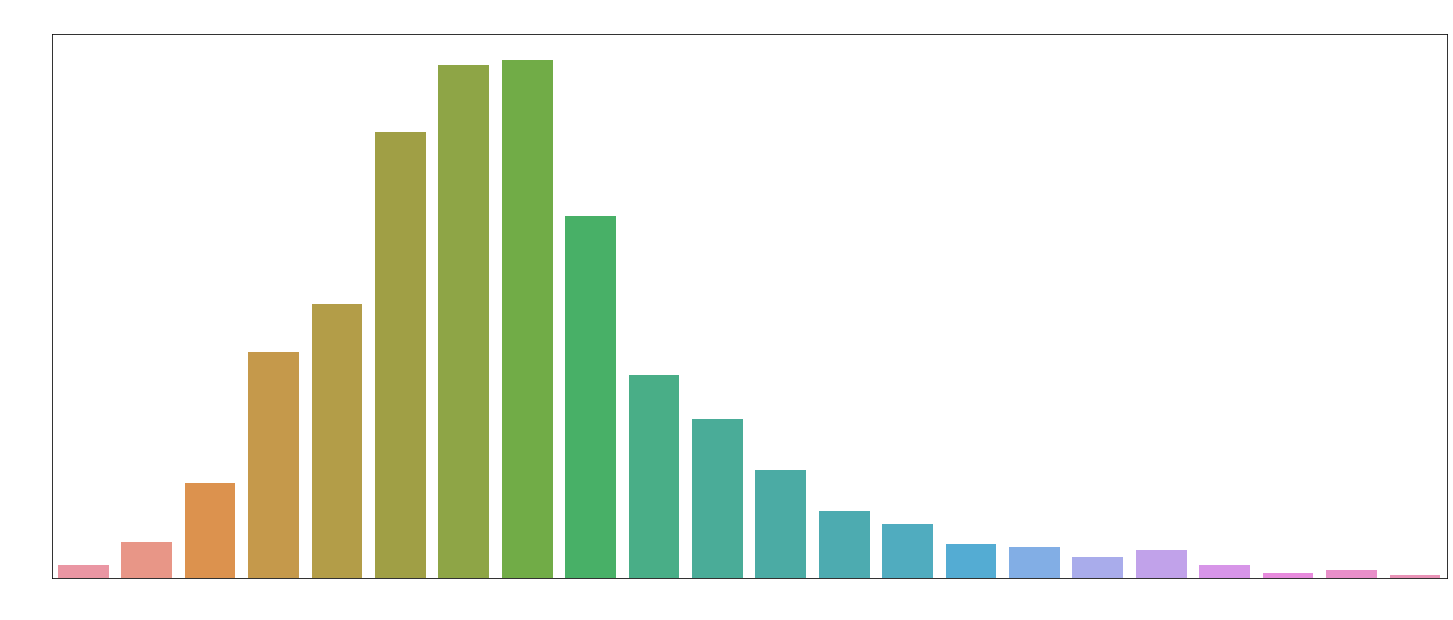

In [13]:
# 전복의 나이 분포 시각화
plt.rcParams["figure.figsize"] = [25,10]
sns.countplot("Target", data = train)
plt.title("전복 나이 별 카운트", fontsize = 30)
plt.xlabel("target(age)", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.show()

In [14]:
temp1 = train["Target"] == 29
temp2 = train["Target"] == 23
train[temp1 | temp2] # 가장 나이가 많은 29세와 23세의 데이터 프레임을 합침

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [15]:
train[train["Target"] == 3] # 가장 나이가 작은 3세의 데이터 프레임

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [42]:
train["Gender"].value_counts()

M    469
I    404
F    380
Name: Gender, dtype: int64

In [43]:
test["Gender"].value_counts()

M    1059
I     938
F     927
Name: Gender, dtype: int64

In [ ]:
t

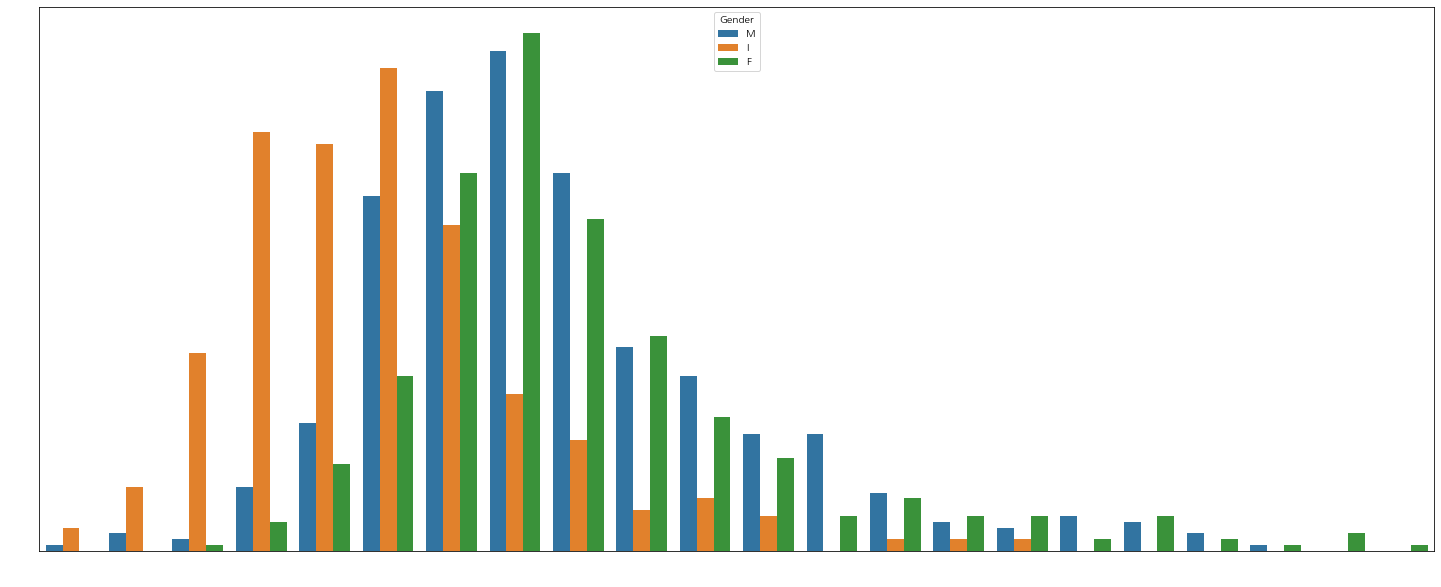

In [41]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Target", hue = "Gender", data = train)
plt.show()

# 데이터 프레임 상으로도 23,29세에 비하여 3세의 전복이 전반적으로 수치가 낮음
# 또한 Gender가 23, 29세인 전복이 모두 F


In [16]:
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [17]:
print(train['Gender'].unique()) # Gender의 중복되지 않은 값을 출력합니다.

['M' 'I' 'F']


In [19]:
train.groupby(["Gender"]).count()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Gender,,,,,,,,
F,380,380,380,380,380,380,380,380
I,404,404,404,404,404,404,404,404
M,469,469,469,469,469,469,469,469


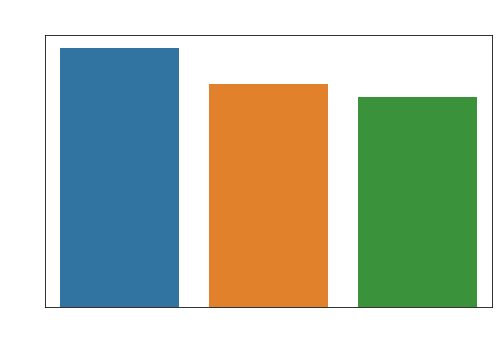

In [47]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = train)
plt.title("성별 데이터 개수 - train",fontsize=30)
plt.show()

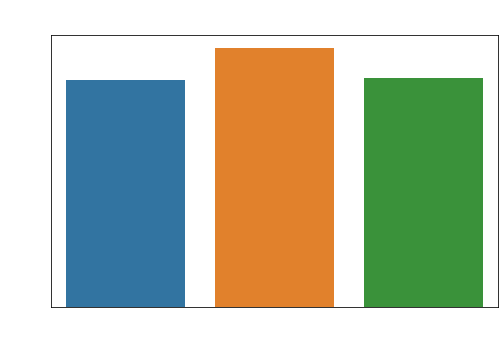

In [48]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = test)
plt.title("성별 데이터 개수 - test",fontsize=30)
plt.show()

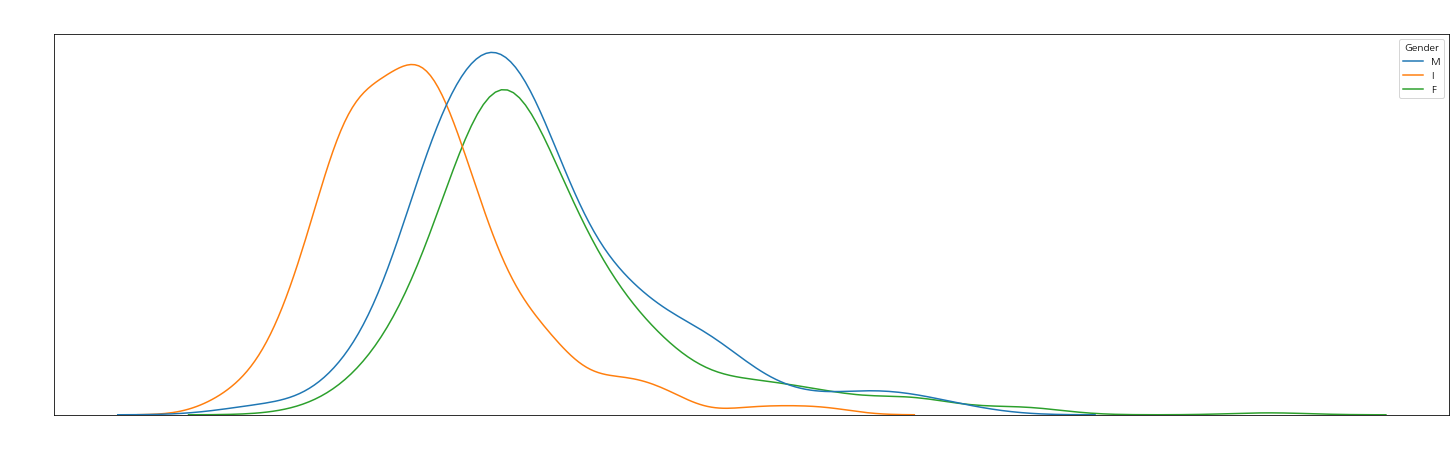

In [28]:
# 성별에 따른 나이 분포 그래프
plt.figure(figsize = (25,7))
sns.kdeplot("Target", hue = "Gender", data= train)
plt.title("성별에 따른 나이 분포", fontsize = 30)
plt.xlabel("target(Age)", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.show()

In [49]:
def corr_heatmap(data):

    # 상관계수그래프
    # 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
    from sklearn.preprocessing import LabelEncoder
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    corr_df = data.copy()
    corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

    # 상관관계 분석도
    plt.figure(figsize=(15,10))

    heat_table = corr_df.corr()
    mask = np.zeros_like(heat_table)
    mask[np.triu_indices_from(mask)] = True
    heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
    heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
    heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
    plt.title('correlation between features', fontsize=40)
    plt.show()

In [52]:
train_pre = train.copy()
test_pre = test.copy()
train_pre = pd.get_dummies(train_pre)
test_pre  = pd.get_dummies(test_pre)

In [54]:
train_pre.columns

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target', 'Gender_F', 'Gender_I',
       'Gender_M'],
      dtype='object')

In [62]:
train_pre = train_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Target"]]
test_pre = test_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]]

# Gender  : 전복 성별
# Length : 전복 길이
# Diameter : 전복 둘레
# Height : 전복 키
# Whole Weight : 전복 전체 무게 = shucked weight + viscra weight + shell weight
# Shucked Weight : 껍질을 제외한 무게
# Viscra Weight : 내장 무게
# Shell Weight : 껍질 무게

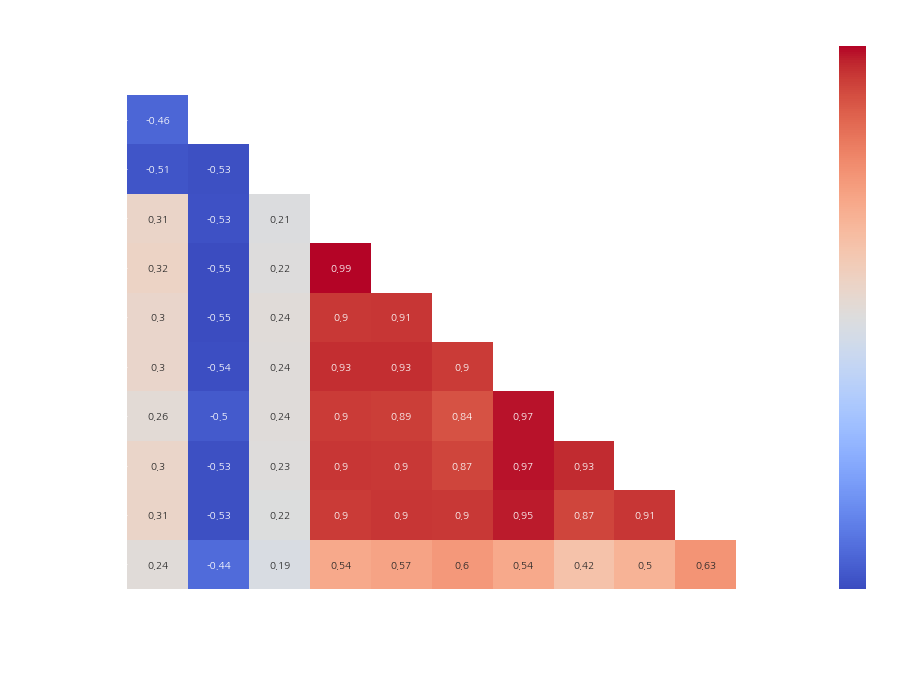

In [63]:
corr_heatmap(train_pre)

In [83]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


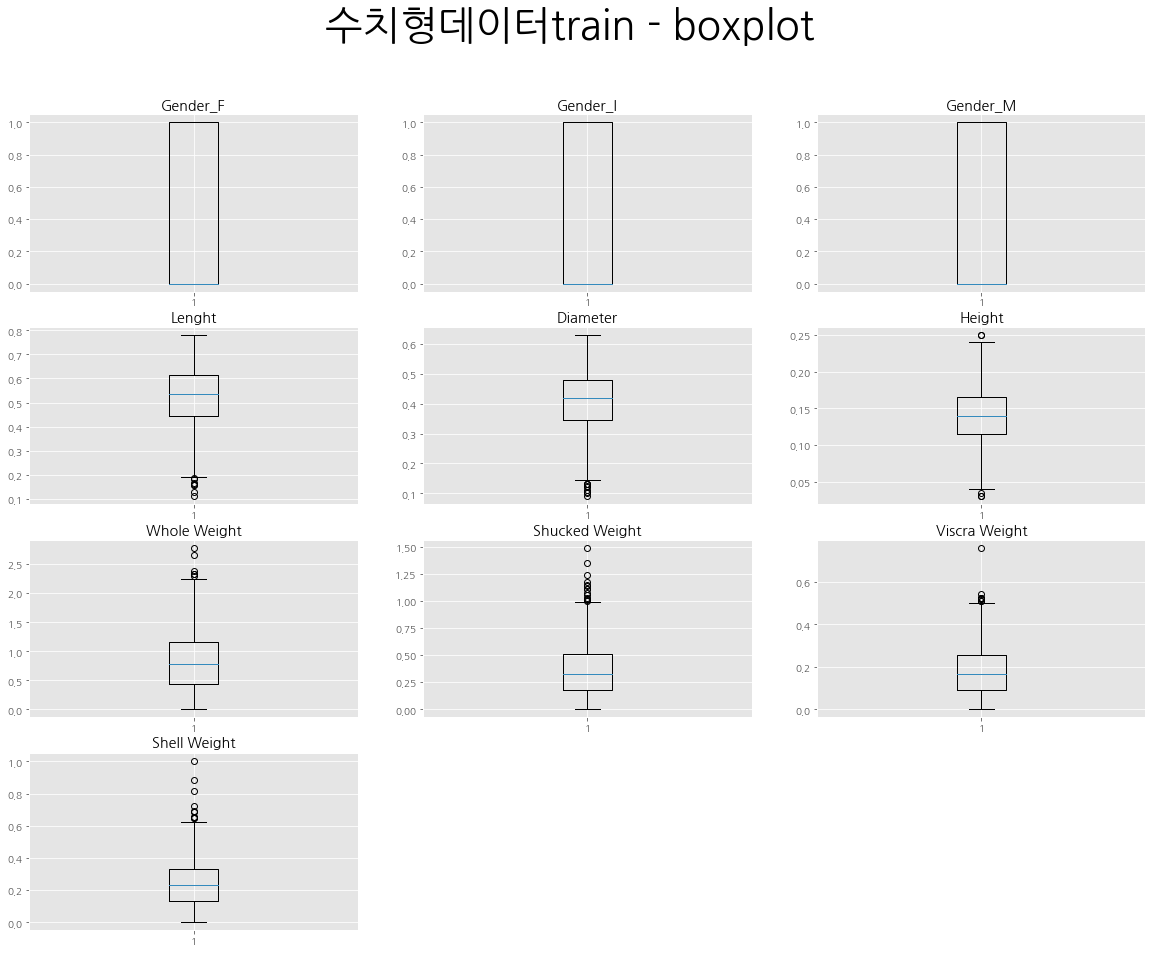

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(train_pre[feature[i]])
plt.show()

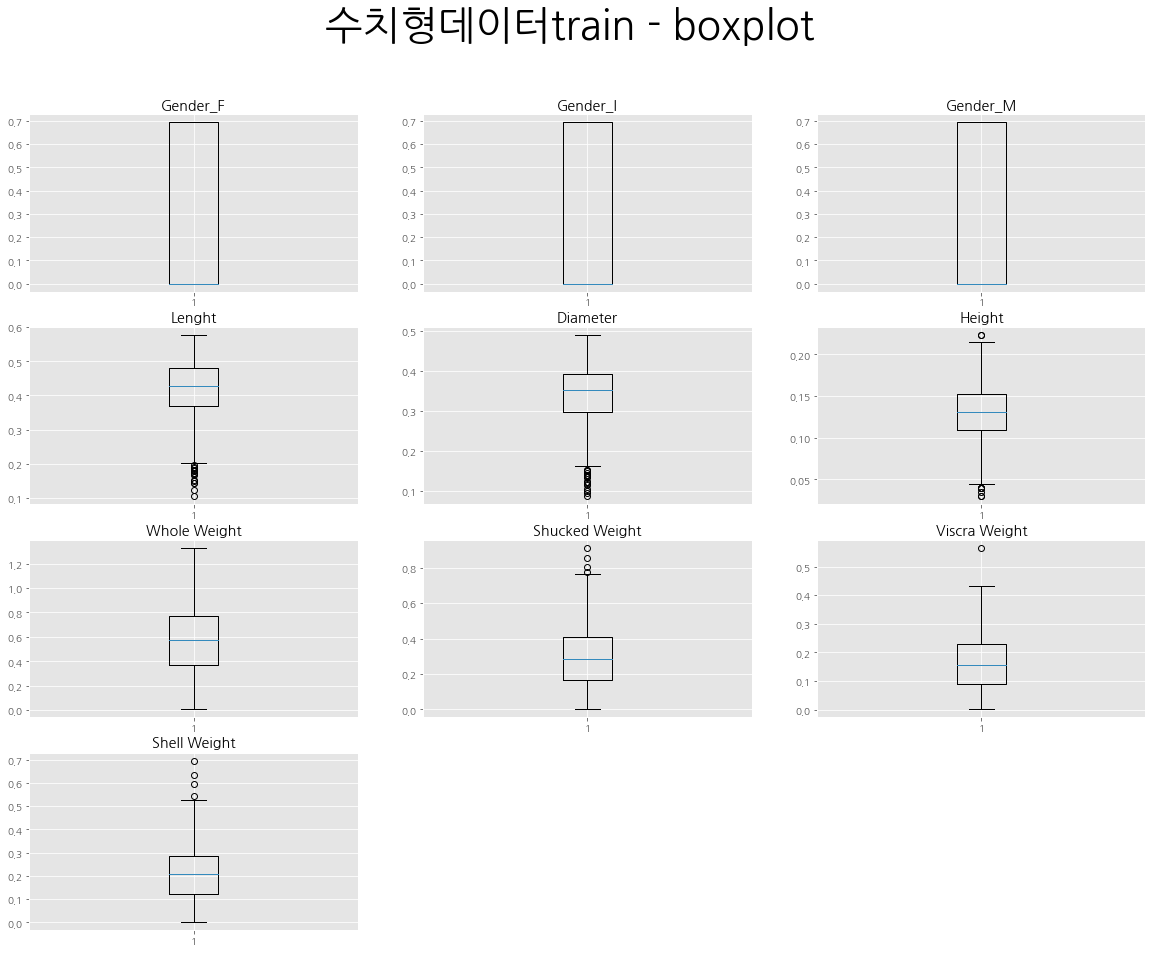

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(np.log1p(train_pre[feature[i]]))
plt.show()

## 이변량 분석 - 길이, 둘레, 키, 무게 vs Target

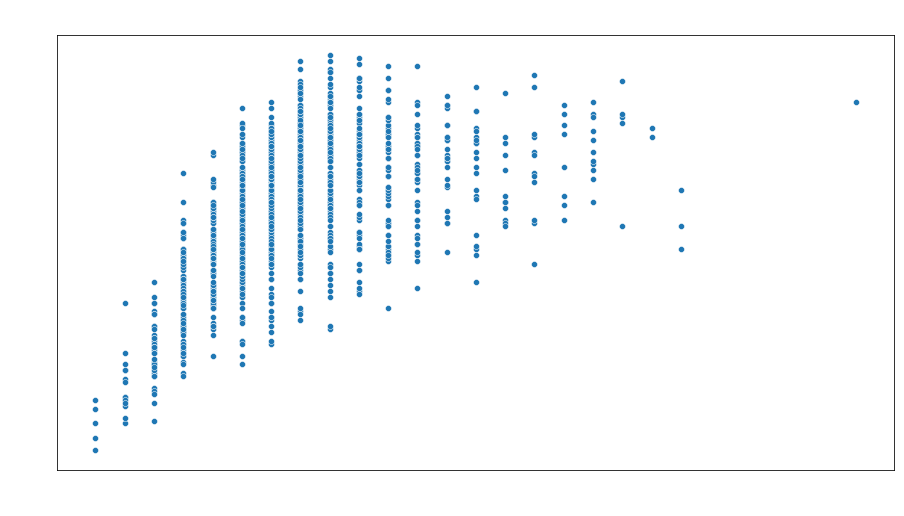

In [86]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Lenght", data = train_pre)
plt.title("Length vs Target", size = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

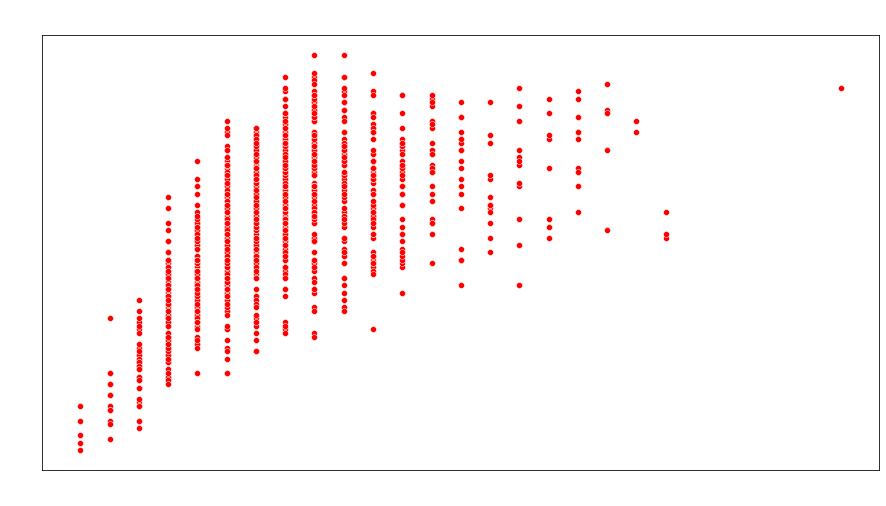

In [75]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Diameter", data = train_pre, color = "red")
plt.title("Diameter vs Target", size = 30)
plt.show()

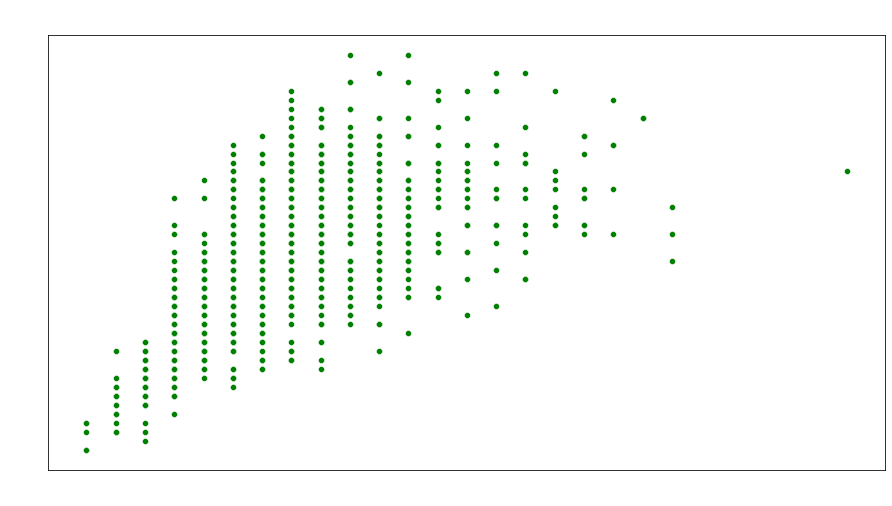

In [76]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Height", data = train_pre, color = "green")
plt.title("Height vs Target", size = 30)
plt.show()

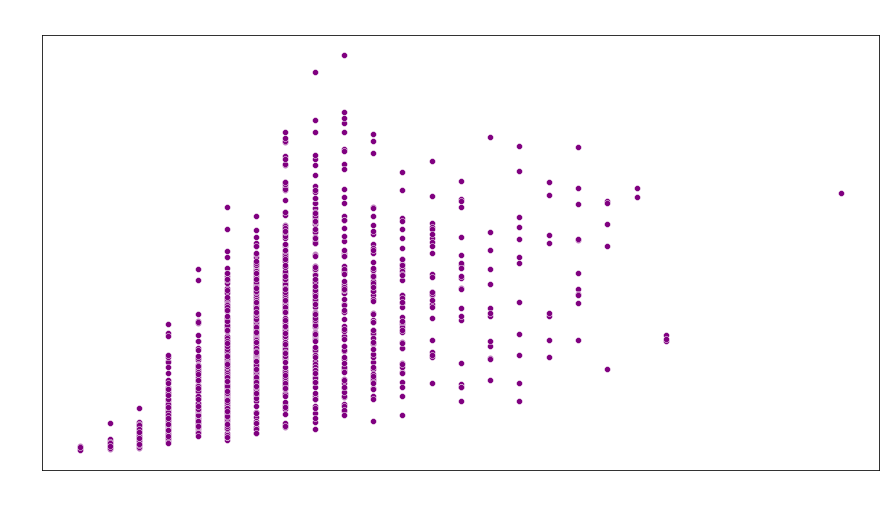

In [82]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Whole Weight", data = train_pre, color = "purple")
plt.title("Weight vs Target", size = 30)
plt.show()

In [65]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [93]:
train_pre.groupby(["Target"])[["Lenght","Diameter","Height","Whole Weight"]].min()

,Lenght,Diameter,Height,Whole Weight
Target,,,,
3,0.110,0.090,0.030,0.0080
4,0.155,0.105,0.040,0.0175
5,0.160,0.120,0.035,0.0210
6,0.235,0.180,0.050,0.0580
7,0.270,0.195,0.070,0.1060
8,0.255,0.195,0.065,0.0800
9,0.290,0.225,0.075,0.1240
10,0.330,0.250,0.080,0.1690
11,0.315,0.245,0.075,0.1555


In [105]:
X_train = train_pre.iloc[:,:-1]
y_train = train_pre["Target"]

X_test = test_pre

In [94]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from ngboost import NGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [111]:
Cat_reg = CatBoostRegressor()
Cat_reg.fit(X_train,y_train)
submission["Target"] = Cat_reg.predict(X_test)

Learning rate set to 0.042428
0:	learn: 3.1638355	total: 10.8ms	remaining: 10.7s
1:	learn: 3.1168176	total: 12.8ms	remaining: 6.41s
2:	learn: 3.0747941	total: 14.6ms	remaining: 4.85s
3:	learn: 3.0358514	total: 16.2ms	remaining: 4.03s
4:	learn: 3.0038837	total: 17.7ms	remaining: 3.53s
5:	learn: 2.9645248	total: 19.4ms	remaining: 3.21s
6:	learn: 2.9287151	total: 20.9ms	remaining: 2.96s
7:	learn: 2.8933952	total: 22.2ms	remaining: 2.75s
8:	learn: 2.8640193	total: 23.7ms	remaining: 2.61s
9:	learn: 2.8303260	total: 25.1ms	remaining: 2.49s
10:	learn: 2.8042021	total: 26.5ms	remaining: 2.39s
11:	learn: 2.7757848	total: 28ms	remaining: 2.31s
12:	learn: 2.7525932	total: 29.3ms	remaining: 2.23s
13:	learn: 2.7292853	total: 30.7ms	remaining: 2.16s
14:	learn: 2.7026974	total: 32.1ms	remaining: 2.1s
15:	learn: 2.6802522	total: 33.6ms	remaining: 2.07s
16:	learn: 2.6594760	total: 35ms	remaining: 2.02s
17:	learn: 2.6409495	total: 36.3ms	remaining: 1.98s
18:	learn: 2.6242116	total: 37.4ms	remaining: 1.9

252:	learn: 1.7934867	total: 327ms	remaining: 965ms
253:	learn: 1.7897265	total: 328ms	remaining: 964ms
254:	learn: 1.7880260	total: 329ms	remaining: 963ms
255:	learn: 1.7865536	total: 331ms	remaining: 961ms
256:	learn: 1.7851011	total: 332ms	remaining: 960ms
257:	learn: 1.7832039	total: 333ms	remaining: 959ms
258:	learn: 1.7804096	total: 335ms	remaining: 957ms
259:	learn: 1.7794675	total: 336ms	remaining: 956ms
260:	learn: 1.7789187	total: 337ms	remaining: 954ms
261:	learn: 1.7769081	total: 338ms	remaining: 952ms
262:	learn: 1.7763600	total: 340ms	remaining: 951ms
263:	learn: 1.7741841	total: 356ms	remaining: 993ms
264:	learn: 1.7735743	total: 358ms	remaining: 993ms
265:	learn: 1.7716275	total: 360ms	remaining: 992ms
266:	learn: 1.7710628	total: 361ms	remaining: 991ms
267:	learn: 1.7684910	total: 363ms	remaining: 990ms
268:	learn: 1.7680633	total: 364ms	remaining: 989ms
269:	learn: 1.7644571	total: 365ms	remaining: 987ms
270:	learn: 1.7636462	total: 366ms	remaining: 986ms
271:	learn: 

512:	learn: 1.4400806	total: 668ms	remaining: 634ms
513:	learn: 1.4394236	total: 669ms	remaining: 633ms
514:	learn: 1.4388882	total: 670ms	remaining: 631ms
515:	learn: 1.4385673	total: 672ms	remaining: 630ms
516:	learn: 1.4380022	total: 673ms	remaining: 629ms
517:	learn: 1.4370397	total: 674ms	remaining: 627ms
518:	learn: 1.4366553	total: 675ms	remaining: 626ms
519:	learn: 1.4350804	total: 677ms	remaining: 625ms
520:	learn: 1.4337202	total: 678ms	remaining: 623ms
521:	learn: 1.4323212	total: 679ms	remaining: 622ms
522:	learn: 1.4319415	total: 680ms	remaining: 620ms
523:	learn: 1.4313704	total: 681ms	remaining: 619ms
524:	learn: 1.4305717	total: 683ms	remaining: 618ms
525:	learn: 1.4303148	total: 684ms	remaining: 616ms
526:	learn: 1.4292632	total: 685ms	remaining: 615ms
527:	learn: 1.4277152	total: 687ms	remaining: 614ms
528:	learn: 1.4274201	total: 688ms	remaining: 613ms
529:	learn: 1.4271813	total: 689ms	remaining: 611ms
530:	learn: 1.4258513	total: 690ms	remaining: 610ms
531:	learn: 

775:	learn: 1.2331433	total: 1s	remaining: 290ms
776:	learn: 1.2331103	total: 1.01s	remaining: 289ms
777:	learn: 1.2322489	total: 1.01s	remaining: 288ms
778:	learn: 1.2308035	total: 1.01s	remaining: 286ms
779:	learn: 1.2301932	total: 1.01s	remaining: 285ms
780:	learn: 1.2295586	total: 1.01s	remaining: 284ms
781:	learn: 1.2292316	total: 1.01s	remaining: 282ms
782:	learn: 1.2291999	total: 1.01s	remaining: 281ms
783:	learn: 1.2273793	total: 1.01s	remaining: 280ms
784:	learn: 1.2259075	total: 1.02s	remaining: 279ms
785:	learn: 1.2256194	total: 1.02s	remaining: 277ms
786:	learn: 1.2251386	total: 1.02s	remaining: 276ms
787:	learn: 1.2235491	total: 1.02s	remaining: 275ms
788:	learn: 1.2225915	total: 1.02s	remaining: 273ms
789:	learn: 1.2215331	total: 1.02s	remaining: 272ms
790:	learn: 1.2211435	total: 1.02s	remaining: 271ms
791:	learn: 1.2197042	total: 1.02s	remaining: 269ms
792:	learn: 1.2194905	total: 1.03s	remaining: 268ms
793:	learn: 1.2192303	total: 1.03s	remaining: 267ms
794:	learn: 1.2

In [112]:
submission.to_csv("first.csv",index = False)

In [29]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [31]:
train.columns[1:]

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

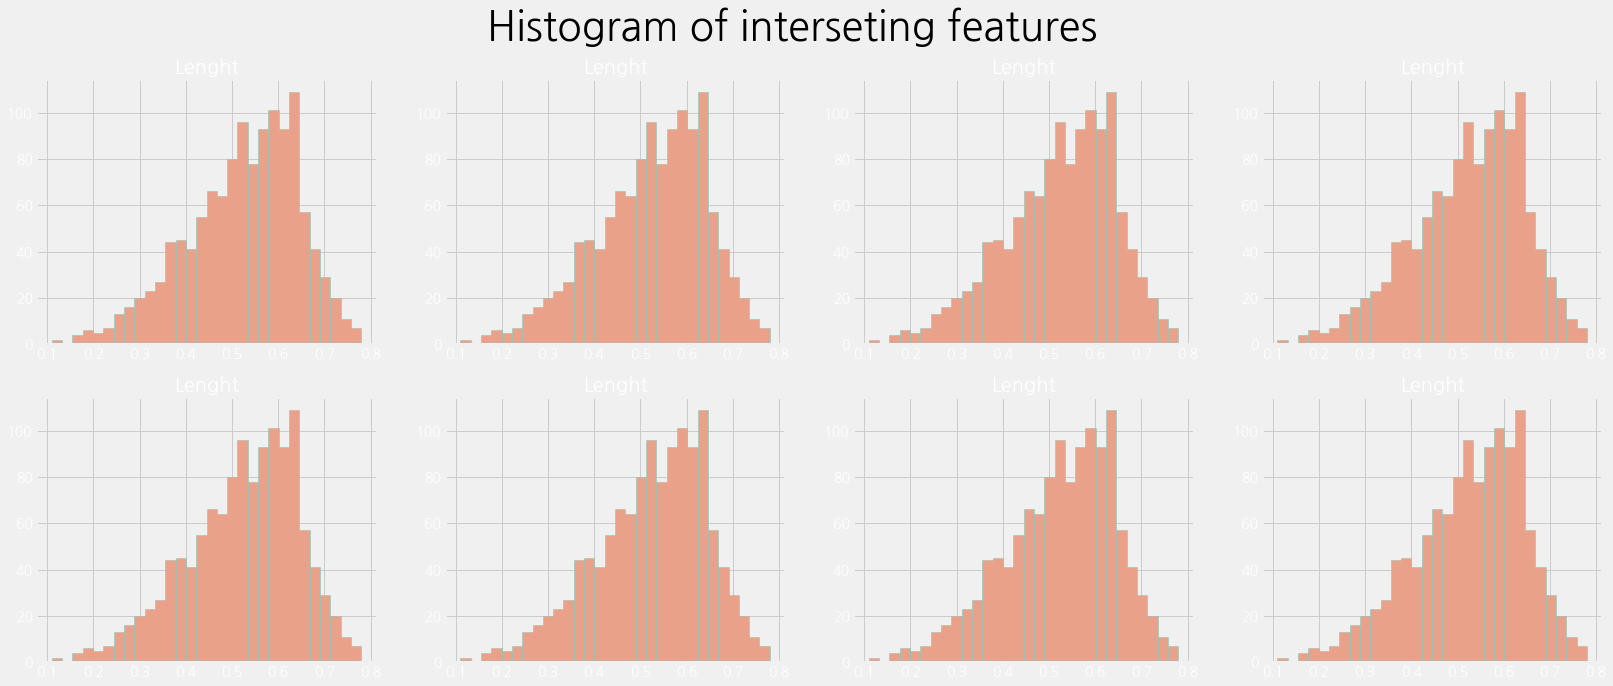

In [38]:
# 수치형 데이터 통계치 그래프

interest_coloumns = train.columns[1:]
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2,4,figsize = (25,10))
fig.suptitle("Histogram of interseting features", fontsize = 40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])


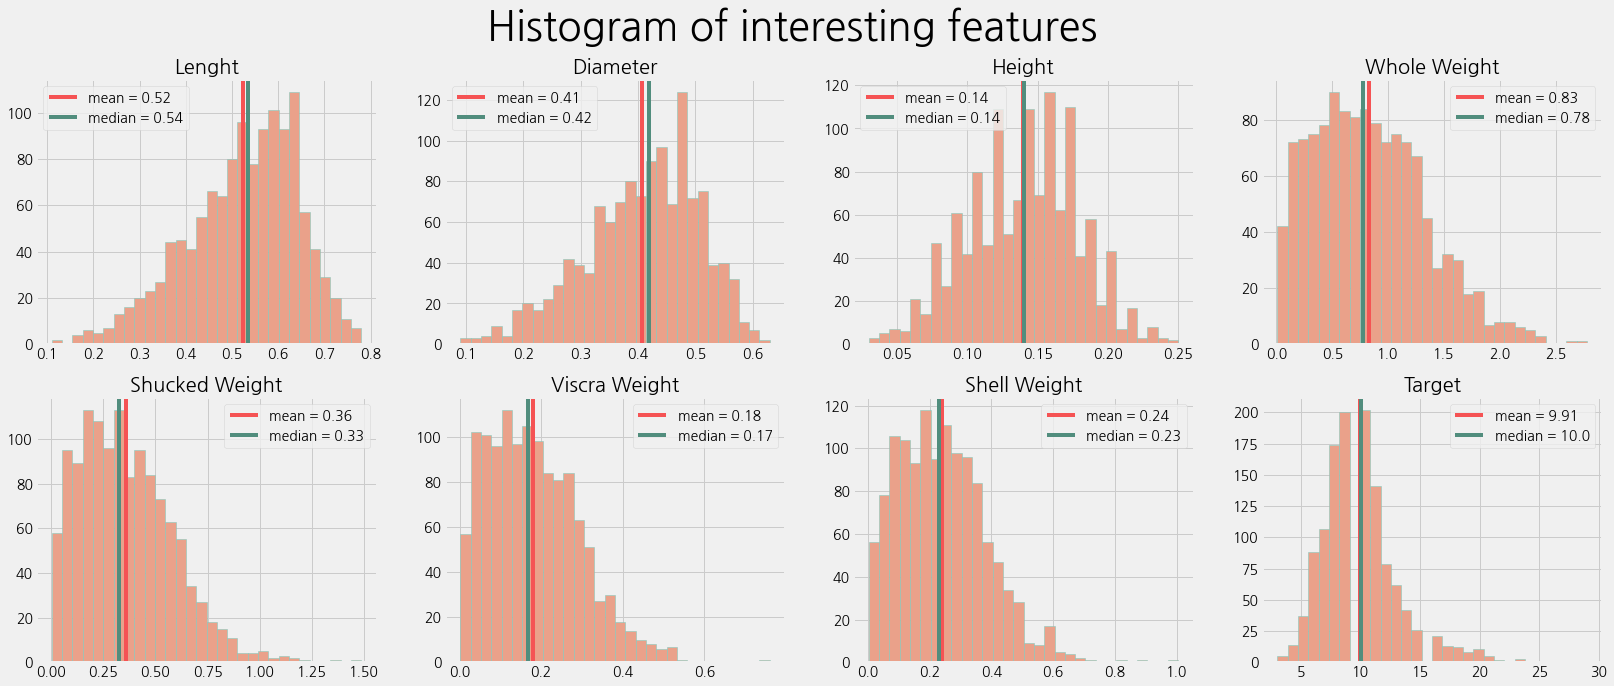

In [44]:
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

# 수치형 데이터 통계치 그래프
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

In [45]:
print('전복의 평균 나이는', round(data_description[interest_coloumns[7]]['mean'],1), '입니다') #round를 하여 소수점 1의 자리까지 반올림 하였습니다.

전복의 평균 나이는 9.9 입니다


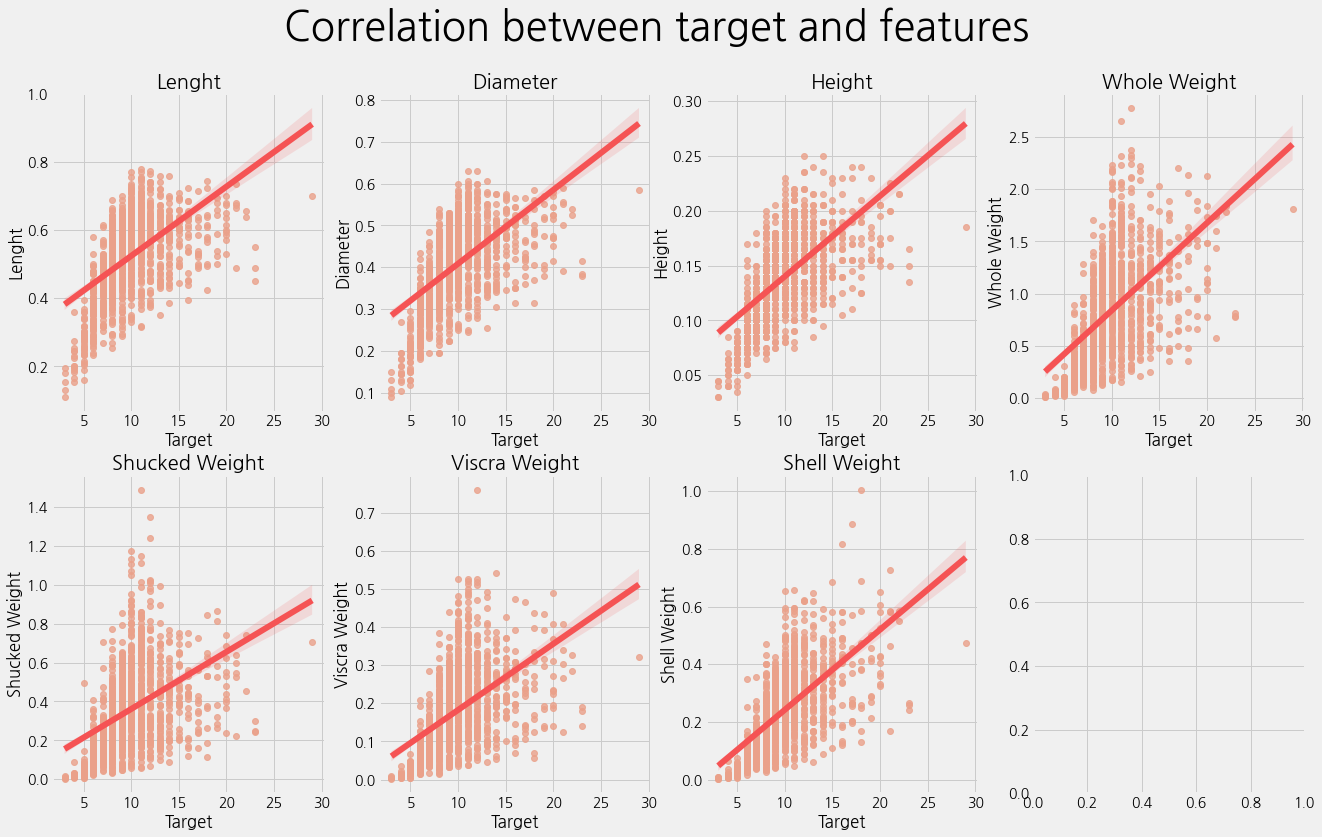

In [46]:
# 수치형 데이터 분포 Target과 상관관계 그래프
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'} , ax = axx) # regplot을 이용하여 추세선과 산점도 그래프를 그려줍니다.
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

In [47]:
# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

Text(0.5, 1.0, 'Correlation between features')

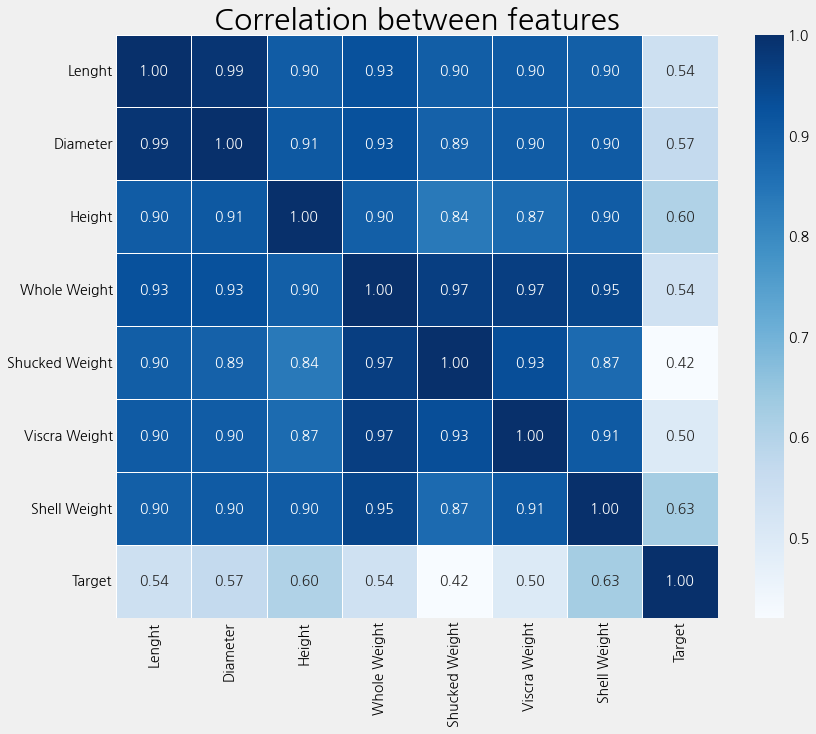

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [49]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.625819
Height,0.604654
Diameter,0.567933
Lenght,0.543789
Whole Weight,0.538404
Viscra Weight,0.497283
Shucked Weight,0.420126


# shell Weight이 가장 높은 상관관계
# 이는 나이가 많을 수록 껍질의 무게가 무거워진다고 해석 가능
# 상관계수가 0.3이상이면 유의미한 양의 상관관계 가진다고 해석 가능
# 나이가 많을 수록 높이, 지름 길이, 무게가 커진다는 결론
